<a href="https://colab.research.google.com/github/hafsaaaaaaaa/MLPROJECT_/blob/main/DOG_VS_CAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete0C6B0D/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [ ]:
for i, example in enumerate(dataset['train']):
  # example = (image, label)
  image, label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = save_dir + "/" + "{}_{}.jpg".format(class_names[label], i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())
  # print(filename)
  # break


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential


In [ ]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10,
                              width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.10, horizontal_flip=True)

train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='validation')


Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


**build** **CNN** **Model**

In [ ]:
from keras.backend import batch_normalization
model = Sequential()

# 1st layer CNN
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# 2nd layer CNN
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# 3rd Layer
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
582/582 [==============================] - 165s 262ms/step - loss: 0.6484 - accuracy: 0.6232 - val_loss: 0.5524 - val_accuracy: 0.7222
Epoch 2/10
582/582 [==============================] - 151s 259ms/step - loss: 0.5436 - accuracy: 0.7203 - val_loss: 0.4869 - val_accuracy: 0.7551
Epoch 3/10
582/582 [==============================] - 149s 256ms/step - loss: 0.5002 - accuracy: 0.7548 - val_loss: 0.4562 - val_accuracy: 0.7824
Epoch 4/10
582/582 [==============================] - 150s 257ms/step - loss: 0.4630 - accuracy: 0.7833 - val_loss: 0.4618 - val_accuracy: 0.7777
Epoch 5/10
582/582 [==============================] - 152s 261ms/step - loss: 0.4362 - accuracy: 0.7964 - val_loss: 0.4069 - val_accuracy: 0.8153
Epoch 6/10
582/582 [==============================] - 149s 256ms/step - loss: 0.4068 - accuracy: 0.8155 - val_loss: 0.3850 - val_accuracy: 0.8224
Epoch 7/10
582/582 [==============================] - 148s 254ms/step - loss: 0.3854 - accuracy: 0.8282 - val_loss: 0.3730 -

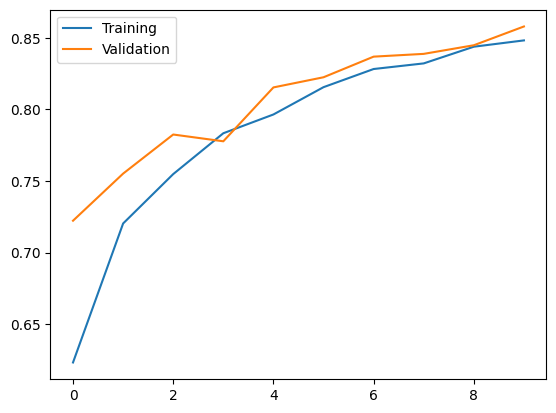

In [ ]:
history.history
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(['Training', 'Validation'])


In [ ]:
# save model
model.save('cats_vs_dogs.h5')


In [ ]:
model_load = tf.keras.models.load_model('cats_vs_dogs.h5')


In [ ]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image

img_url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))

image_array = image.img_to_array(img)

img = np.expand_dims(image_array, axis=0)

img = img/255

prediction = model.predict(img)

TH = 0.5
prediction = int(prediction[0][0]>TH)
classes = {v:k for k,v in train_generator.class_indices.items()}
classes[prediction]


1/1 [==============================] - 0s 225ms/step


'cat'

In [ ]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image

img_url = "https://cdn.pixabay.com/photo/2017/09/25/13/12/puppy-2785074_1280.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))

image_array = image.img_to_array(img)

img = np.expand_dims(image_array, axis=0)

img = img/255

prediction = model.predict(img)

TH = 0.5
prediction = int(prediction[0][0]>TH)
classes = {v:k for k,v in train_generator.class_indices.items()}
classes[prediction]


1/1 [==============================] - 0s 19ms/step


'dog'